### **RQ2: This script test tweet classifier model with different IO reply threshold**

In [2]:
import pandas as pd
import numpy as np
import warnings

import importlib

#### packages
import helper.strategy_helper as st
import helper.visualization as viz_hp
import config.config as config_hp
import helper.stat_helper as stat_hp

### **Get tweet classifier features**

In [3]:
importlib.reload(stat_hp)

import importlib

tweet_features = './../data/tweet_classifier_features.pkl.gz'

df_all_stat = pd.read_pickle(tweet_features)

### **Load all targeted and their replies**

In [4]:
#All targeted tweets and their replies
balanced_pos_conversation = './../data/balanced_positive_conversation.pkl.gz'

df_pos = pd.read_pickle(balanced_pos_conversation)

print(df_pos.columns)

Index(['tweet_text', 'conversation_id', 'replier_tweetid', 'replier_userid',
       'poster_userid', 'poster_tweetid', 'tweet_time', 'tweet_language',
       'replier_label', 'year', 'campaign', 'tweet_label', 'tweet_time_year',
       'common', 'id', 'username'],
      dtype='object')


### **Count the number of replies from IO in each targeted tweet**

In [8]:
df_pos_replier = df_pos.loc[df_pos['replier_label'] == 1]

In [9]:
df_pos_grp = (df_pos_replier
              .groupby(['poster_tweetid'])['replier_tweetid']
              .size()
              .to_frame('positive_replier_count')
              .reset_index()
             )

In [10]:
df_pos_grp.columns

Index(['poster_tweetid', 'positive_replier_count'], dtype='object')

In [11]:
df_all_stat['poster_tweetid'] = df_all_stat['poster_tweetid'].astype(str)
df_pos_grp['poster_tweetid'] = df_pos_grp['poster_tweetid'].astype(str)

In [12]:
#### Add the number of IO replies that each tweet got to feature data

df_all_stat = df_all_stat.merge(df_pos_grp,
                  on='poster_tweetid',
                  how='left'
                 )

### **Test with same posters**
Task: See how the reply threshold affect the classification of targeted tweets <br />
Things to be kept constant as the original setting: same poster in both + and - side <br />
balanced dataset

In [15]:
'tweet_label' in df_all_stat.columns

True

In [17]:
df_all_stat['tweet_label'].unique()

array([1, 0])

#### **Test how result change with threshold of reply from IO**

In [26]:
importlib.reload(stat_hp)
columns_not_include = ['poster_userid',
                       'positive_replier_count'
                      ]
all_results = []
for i in range(5, 21):
    #postivie dataset
    if i == 5:
        df_sample = df_all_stat
    else:
        df_1 = df_all_stat.loc[
        (df_all_stat['positive_replier_count'] >= i)
        ]

        total_flag1 = len(df_1)

        print(total_flag1)

        #negative dataset
        #maintain the same poster
        df_neg_data = df_all_stat.loc[
            df_all_stat['tweet_label'] == 0
        ]
        df_0_all = df_neg_data.loc[
            df_neg_data['poster_userid'].isin(df_1['poster_userid'])
        ]

        ## Maintain the balanced dataset
        df_0 = df_0_all.sample(n=total_flag1, 
                               random_state=42
                              )

        df_sample = pd.concat([df_1, df_0],
                              ignore_index=True
                             )
        print(i, ' Total 0 :', len(df_0))
        print(i, ' Total 1: ', len(df_1))
        
    total_len = len(df_sample)
    
    print(i, ' Total length :', total_len)
    print('tweet_label' in df_all_stat.columns)
    
    cv_results_tuned_model = \
    stat_hp.run_model_with_best_threshold(df_sample,
                                          columns_not_include=columns_not_include,
                                          model_type='random', 
                                          y_column = 'tweet_label',
                                          filename=None,
                                         )
    cv_results_tuned_model['total_data'] = total_len
    cv_results_tuned_model['reply_threshold'] = i
    
    all_results.append(cv_results_tuned_model)
    
(pd.concat(all_results, ignore_index=True)
).to_pickle('./../data/tweet_classifier_different_reply_threshold.pkl.gz')

5  Total length : 7816
True

 **** random ****
Running Random Forest


/N/slate/potem/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


2911
6  Total 0 : 2911
6  Total 1:  2911
6  Total length : 5822
True

 **** random ****
Running Random Forest


/N/slate/potem/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


2196
7  Total 0 : 2196
7  Total 1:  2196
7  Total length : 4392
True

 **** random ****
Running Random Forest


/N/slate/potem/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


1725
8  Total 0 : 1725
8  Total 1:  1725
8  Total length : 3450
True

 **** random ****
Running Random Forest


/N/slate/potem/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


1383
9  Total 0 : 1383
9  Total 1:  1383
9  Total length : 2766
True

 **** random ****
Running Random Forest


/N/slate/potem/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


1126
10  Total 0 : 1126
10  Total 1:  1126
10  Total length : 2252
True

 **** random ****
Running Random Forest


/N/slate/potem/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


939
11  Total 0 : 939
11  Total 1:  939
11  Total length : 1878
True

 **** random ****
Running Random Forest


/N/slate/potem/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


814
12  Total 0 : 814
12  Total 1:  814
12  Total length : 1628
True

 **** random ****
Running Random Forest


/N/slate/potem/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


707
13  Total 0 : 707
13  Total 1:  707
13  Total length : 1414
True

 **** random ****
Running Random Forest


/N/slate/potem/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


614
14  Total 0 : 614
14  Total 1:  614
14  Total length : 1228
True

 **** random ****
Running Random Forest


/N/slate/potem/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


536
15  Total 0 : 536
15  Total 1:  536
15  Total length : 1072
True

 **** random ****
Running Random Forest


/N/slate/potem/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


486
16  Total 0 : 486
16  Total 1:  486
16  Total length : 972
True

 **** random ****
Running Random Forest


/N/slate/potem/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


438
17  Total 0 : 438
17  Total 1:  438
17  Total length : 876
True

 **** random ****
Running Random Forest


/N/slate/potem/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


397
18  Total 0 : 397
18  Total 1:  397
18  Total length : 794
True

 **** random ****
Running Random Forest


/N/slate/potem/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


366
19  Total 0 : 366
19  Total 1:  366
19  Total length : 732
True

 **** random ****
Running Random Forest


/N/slate/potem/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


331
20  Total 0 : 331
20  Total 1:  331
20  Total length : 662
True

 **** random ****
Running Random Forest


/N/slate/potem/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


### **Plot the different threshold result**

In [29]:
importlib.reload(viz_hp)

df_result = pd.read_pickle(
   './../data/tweet_classifier_different_reply_threshold.pkl.gz'
)

print(df_result.columns)

Index(['fit_time', 'score_time', 'estimator', 'test_precision',
       'train_precision', 'test_recall', 'train_recall', 'test_f1', 'train_f1',
       'test_roc_auc', 'train_roc_auc', 'threshold', 'algorithm', 'total_data',
       'reply_threshold'],
      dtype='object')


In [33]:
columns = [
    'fit_time', 'score_time', 'test_precision', 'train_precision',
    'test_recall', 'train_recall', 'test_f1', 'train_f1',
    'test_roc_auc', 'train_roc_auc',
    'reply_threshold'
]


In [35]:
df_grp = df_result[columns].groupby(['reply_threshold']).mean().reset_index()

In [36]:
df_grp.columns

Index(['reply_threshold', 'fit_time', 'score_time', 'test_precision',
       'train_precision', 'test_recall', 'train_recall', 'test_f1', 'train_f1',
       'test_roc_auc', 'train_roc_auc'],
      dtype='object')

./../plots/tweet_classifier_reply_threshold.png
./../plots/tweet_classifier_reply_threshold.png


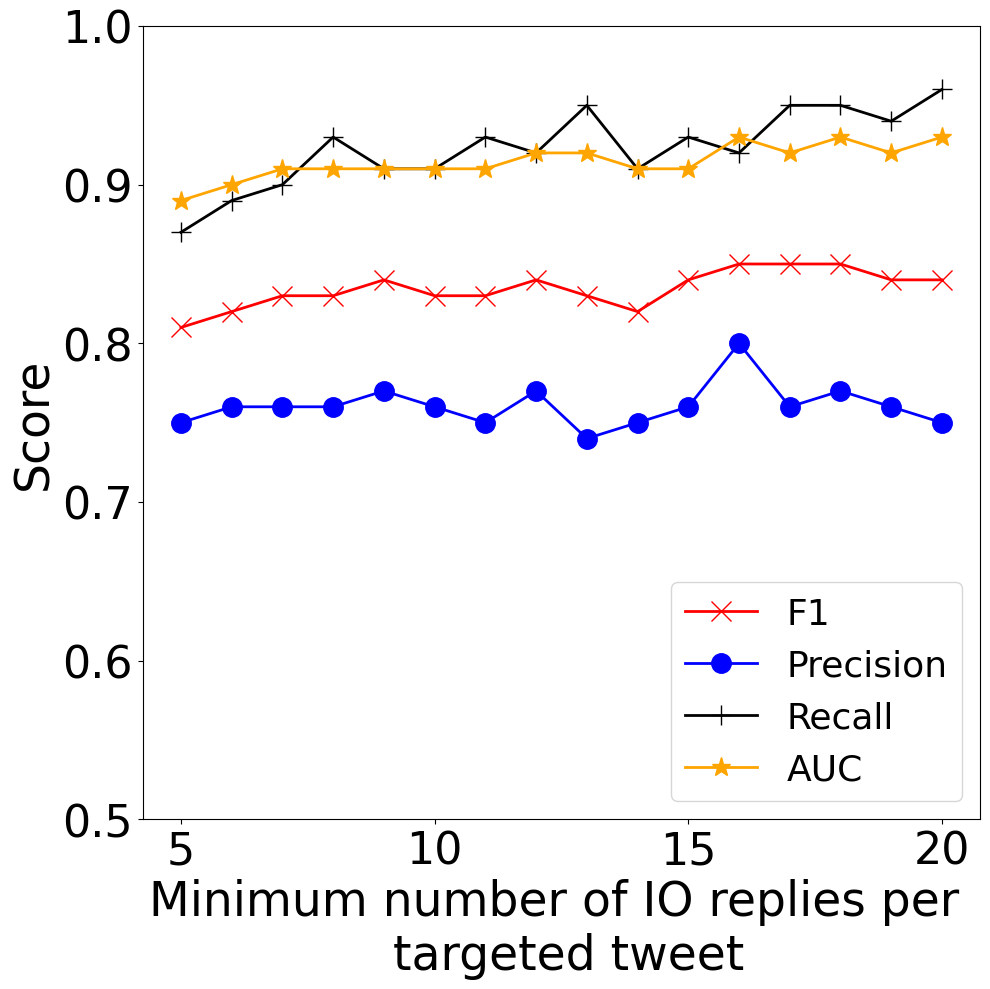

In [37]:
importlib.reload(viz_hp)

df_grp = df_grp.sort_values(by=['reply_threshold'],
                                  ascending=True
                                 )
df_grp = round(df_grp, 2)

parameters = {
        'data': df_grp,
        'size': (10, 10),
        'fontsize': 32,
        'tick_size': 28,
        'legend_font': 26,
        'legend_size': 26,
        'complementary': False,
        'columns': [
            {'column': 'test_f1',
             'label': 'F1',
            },
            {
            'column': 'test_precision',
             'label': 'Precision'
            },
            {
                'column': 'test_recall',
                'label': 'Recall',
            },
            {'column': 'test_roc_auc',
             'label': 'AUC',
            }
        ],
        'x': 'reply_threshold',
        'xlabel': 'Minimum number of IO replies per \n targeted tweet',
        'ylabel': 'Score',
        'legend_location': 'lower right',
        'log_yscale': False,
        'log_xscale': False,
        'save': {
            'path': './../plots',
            'filename': 'tweet_classifier_reply_threshold.png'
        },
        'random_color': False
    }
    

viz_hp.line_plot(parameters)